In [2]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# create a set of random latitudes and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# use the print() function to display the coordinate pairs
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-26.40019368102537 -3.023534098461397
-5.90963064018581 -61.70780757667687
50.355777235029905 58.18537912842899
41.350715876290906 16.542596953467267
55.28991649662123 -92.11370784878596
77.85200707480689 37.525288835621296
61.308094161665906 -15.366188694638623
-38.727068496506575 95.34671312530679
59.67145562923744 -46.28269913227601
-34.51584486621654 -179.59211046033724
29.908252925899518 -82.70632245953824
67.05076848571298 -123.02289982126138
47.97013171043821 94.33357724481476
-19.54811793660521 129.66853532154232
3.455794122118874 139.73792807358313
82.004501449528 50.90855563861405
1.7428449630869665 -43.82902460809771
-7.265570498713942 46.54591585784928
48.662152375726635 -16.36906132307834
67.45647504677501 38.2189116170652
64.06740380011223 140.2303140678934
63.531761930689896 -25.955696531715745
-63.12781107122789 -37.822906795131274
14.758374675727339 -145.95490812605343
-87.45251692781237 178.94376806385435
-2.5278928011722144 19.713118510041994
-44.15959701153669 20.97

82.43061519594352 -81.48618610960027
-74.50379536181732 63.00453881095953
-43.785738180359374 -153.363631827071
15.139255168666239 105.3309571122195
58.01846647165672 -0.13989846599952216
-11.650106349109535 -5.40926662715475
-65.25813374958315 -20.423076311322234
-61.847892410691685 130.4621821169505
-22.135236239341722 -56.26865562508074
44.250497814958266 -15.79466285176423
57.63171782306256 162.57814078313044
-24.10698509738377 -100.52178919197259
-80.66302813108842 80.20939897943748
16.853563614815158 162.66693856309257
-66.70203185911186 -158.63751449944306
49.91314230967771 74.49364049465001
37.38609594144738 37.93638481872816
-80.63479752097871 -146.17454853733335
-63.26616836544892 47.5369839070288
-14.325349454139513 -33.972088964769085
1.7065350194838658 -26.952621323949955
-75.4899635012498 139.08626032559465
48.54026769640464 -131.77333643389522
-25.42850378605405 70.95558907424663
19.557692189858315 -15.69771422639758
-58.83930414125757 148.28219057176614
-84.167408996310

57.13441105043762 -46.548185921888916
18.56698480160415 151.4725814211946
77.33045803305424 -11.6477456304643
47.01267261989844 -147.84017711953112
-2.2710042553846677 37.00135733268854
22.620510541557834 -129.8653698461817
86.13110483414604 -2.891748670262899
-61.24362274697816 163.78122793818363
-49.73764932911787 -91.683173076803
-13.168446153264924 30.281926433593213
0.6627308018411782 157.80583693921608
-16.331711170009015 -68.83099383150709
-72.64280833384737 -44.07430441733402
-81.17251990784334 -78.7989504777457
-82.91960339045184 67.06731131650571
-78.21652182551227 -109.39024365165331
1.3202846822980092 172.37870049597575
-62.52596983840015 -32.312632861451135
67.34597136489333 149.94499848558985
-76.83454411323885 -64.26633755877066
-46.624471946949924 -14.566571397423786
-0.12835604302284764 -55.24549478105645
-33.99915405801106 -121.42428182069429


In [6]:
# import citipy
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [8]:
# import the request library
import requests
# import the API key
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=092706d25a6982b91393cc93c90fa96c


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# create an empty list to hold the weather data
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

#create the counters
record_count = 1
set_count = 1

#loop through all of the cities in our list
for i, city in enumerate(cities):
    
    #group the cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #create endpoint URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # log the URL, record, and set numbers and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # add 1 to the record count 
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | manicore
Processing Record 3 of Set 1 | batamshinskiy
Processing Record 4 of Set 1 | bisceglie
Processing Record 5 of Set 1 | sioux lookout
Processing Record 6 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 1 | hofn
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | qaqortoq
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | lake city
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | erzin
Processing Record 14 of Set 1 | kununurra
Processing Record 15 of Set 1 | biak
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | carutapera
Processing Record 18 of Set 1 | mitsamiouli
Processing Record 19 of Set 1 | dingle
Processing Record 20 of Set 1 | ostrovnoy
Processing Record 21 of Set 1 | ust-nera
Processing Record 22

Processing Record 37 of Set 4 | neryungri
Processing Record 38 of Set 4 | cherskiy
Processing Record 39 of Set 4 | omboue
Processing Record 40 of Set 4 | alekseyevsk
Processing Record 41 of Set 4 | mpika
Processing Record 42 of Set 4 | aklavik
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | ludwigslust
Processing Record 45 of Set 4 | ndende
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | shingu
Processing Record 48 of Set 4 | ancud
Processing Record 49 of Set 4 | zhigansk
Processing Record 50 of Set 4 | avarua
Processing Record 1 of Set 5 | arlit
Processing Record 2 of Set 5 | winnemucca
Processing Record 3 of Set 5 | myitkyina
Processing Record 4 of Set 5 | jiwani
Processing Record 5 of Set 5 | anadyr
Processing Record 6 of Set 5 | belaya gora
Processing Record 7 of Set 5 | svencionys
Processing Record 8 of Set 5 | kaspiysk
Processing Record 9 of Set 5 | muros
Processing Record 10 of Set 5 | khasan
Processing Record 11 of Set 5 | ham

Processing Record 30 of Set 8 | hambantota
Processing Record 31 of Set 8 | shizunai
Processing Record 32 of Set 8 | la ronge
Processing Record 33 of Set 8 | dokka
Processing Record 34 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 35 of Set 8 | altay
Processing Record 36 of Set 8 | spirit river
Processing Record 37 of Set 8 | tiksi
Processing Record 38 of Set 8 | abidjan
Processing Record 39 of Set 8 | punta de bombon
Processing Record 40 of Set 8 | torata
Processing Record 41 of Set 8 | kochi
Processing Record 42 of Set 8 | pasighat
Processing Record 43 of Set 8 | novita
Processing Record 44 of Set 8 | camopi
Processing Record 45 of Set 8 | shakiso
Processing Record 46 of Set 8 | challapata
Processing Record 47 of Set 8 | mahon
Processing Record 48 of Set 8 | the valley
Processing Record 49 of Set 8 | barabai
Processing Record 50 of Set 8 | tarut
Processing Record 1 of Set 9 | juifang
City not found. Skipping...
Processing Record 2 of Set 9 | lyaskelya
Processin

Processing Record 14 of Set 12 | ola
Processing Record 15 of Set 12 | kuche
City not found. Skipping...
Processing Record 16 of Set 12 | jalu
Processing Record 17 of Set 12 | nadadores
Processing Record 18 of Set 12 | salalah
Processing Record 19 of Set 12 | serabu
Processing Record 20 of Set 12 | mazagao
Processing Record 21 of Set 12 | acapulco
Processing Record 22 of Set 12 | praia da vitoria
Processing Record 23 of Set 12 | yerbogachen
Processing Record 24 of Set 12 | palmer
Processing Record 25 of Set 12 | orodara
Processing Record 26 of Set 12 | paamiut
Processing Record 27 of Set 12 | westport
Processing Record 28 of Set 12 | isla mujeres
Processing Record 29 of Set 12 | ternate
Processing Record 30 of Set 12 | gongzhuling
Processing Record 31 of Set 12 | puerto narino
Processing Record 32 of Set 12 | parras
City not found. Skipping...
Processing Record 33 of Set 12 | cayenne
Processing Record 34 of Set 12 | nicoya
Processing Record 35 of Set 12 | warqla
City not found. Skipping

In [17]:
# conver the array od dictionaries to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,62.24,46,0,6.91,US,2022-10-11 23:20:56
1,Manicore,-5.8092,-61.3003,83.98,52,90,1.79,BR,2022-10-11 23:23:27
2,Batamshinskiy,50.5594,58.2747,48.63,34,100,7.76,KZ,2022-10-11 23:23:28
3,Bisceglie,41.2420,16.5044,61.79,93,49,3.15,IT,2022-10-11 23:23:29
4,Sioux Lookout,50.1001,-91.9170,68.07,52,75,5.75,CA,2022-10-11 23:23:29
5,Hofn,64.2539,-15.2082,45.34,99,100,7.34,IS,2022-10-11 23:23:31
6,Busselton,-33.6500,115.3333,52.83,64,98,9.93,AU,2022-10-11 23:23:31
7,Qaqortoq,60.7167,-46.0333,31.10,77,97,5.41,GL,2022-10-11 23:23:31
8,Vaini,-21.2000,-175.2000,78.96,78,40,13.80,TO,2022-10-11 23:23:32
9,Lake City,30.1897,-82.6393,78.85,78,75,6.91,US,2022-10-11 23:23:15


In [13]:
# reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-10-11 23:20:56,42.0970,-79.2353,62.24,46,0,6.91
1,Manicore,BR,2022-10-11 23:23:27,-5.8092,-61.3003,83.98,52,90,1.79
2,Batamshinskiy,KZ,2022-10-11 23:23:28,50.5594,58.2747,48.63,34,100,7.76
3,Bisceglie,IT,2022-10-11 23:23:29,41.2420,16.5044,61.79,93,49,3.15
4,Sioux Lookout,CA,2022-10-11 23:23:29,50.1001,-91.9170,68.07,52,75,5.75
5,Hofn,IS,2022-10-11 23:23:31,64.2539,-15.2082,45.34,99,100,7.34
6,Busselton,AU,2022-10-11 23:23:31,-33.6500,115.3333,52.83,64,98,9.93
7,Qaqortoq,GL,2022-10-11 23:23:31,60.7167,-46.0333,31.10,77,97,5.41
8,Vaini,TO,2022-10-11 23:23:32,-21.2000,-175.2000,78.96,78,40,13.80
9,Lake City,US,2022-10-11 23:23:15,30.1897,-82.6393,78.85,78,75,6.91


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# extracting the relevant feild for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# import the time module
import time

#get todays date in seconds
today = time.strftime("%x")
today

'10/11/22'

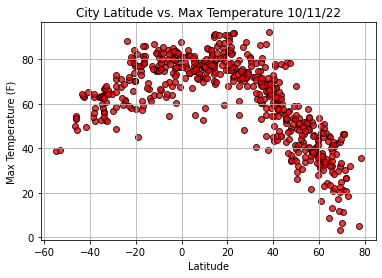

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps, color="red",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

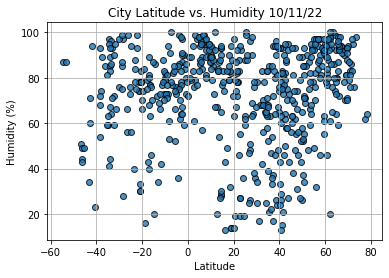

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

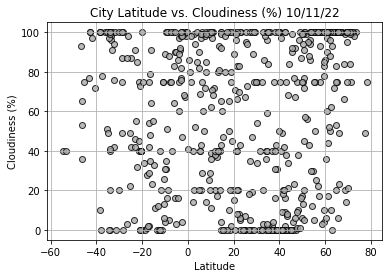

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness, color="darkgray",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

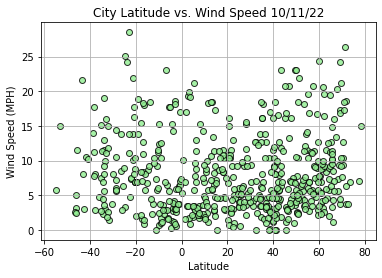

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed, color="lightgreen",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()